In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
wn=pd.read_csv('wineQuality.csv')

In [3]:
wn.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wn.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wn['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [6]:
wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: xlabel='quality', ylabel='count'>

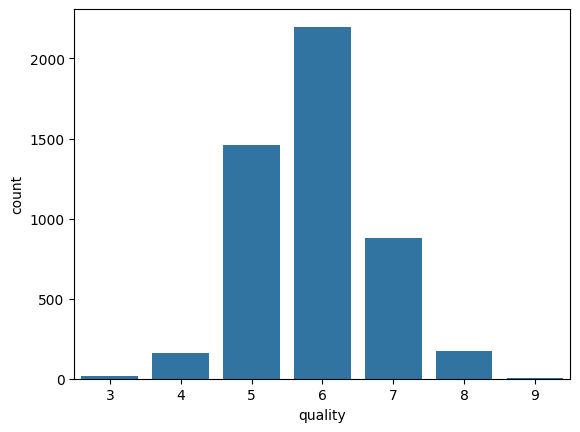

In [8]:
sns.countplot(x='quality',data=wn)

In [9]:
wn['good_quality']=[1 if x>5 else 0 for x in wn['quality']]

<Axes: xlabel='good_quality', ylabel='count'>

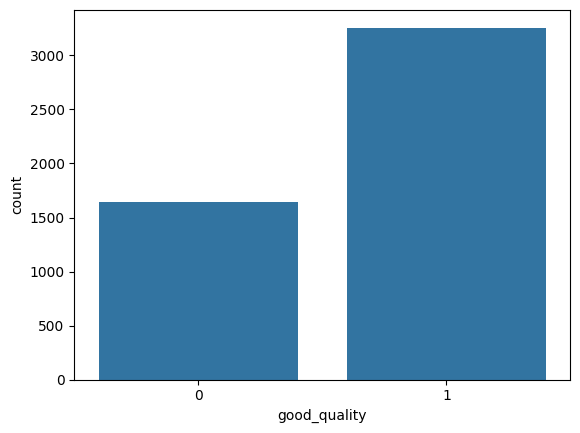

In [11]:
sns.countplot(x='good_quality',data=wn)

# Making of the variable of X and Y

In [12]:
X=wn.drop(columns=['quality','good_quality'],axis=1)
y=wn['good_quality']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
wn.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good_quality'],
      dtype='object')

In [18]:
column=['fixed acidity', 'residual sugar',
        'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH',  'alcohol',]

In [19]:
print(len(column))


7


In [20]:
scaler=StandardScaler()
for i in column:
    X_train[i]=scaler.fit_transform(X_train[[i]])
    X_test[i]=scaler.transform(X_test[[i]])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [22]:
clfs=[LogisticRegression(),SVC(kernel='rbf'),DecisionTreeClassifier(max_depth=10),DecisionTreeClassifier(min_samples_leaf=10,random_state=42)]

In [24]:
model_aucc={}
for clf in clfs:
    print(f'Model {clf}')
    clf.fit(X_train,Y_train)    
    print(f'Training Score: {clf.score(X_train,Y_train)*100}')
    print(f'Test Score: {clf.score(X_test,Y_test)*100}')
    model_aucc.update({clf:clf.score(X_test,Y_test)})

    print('---------------------------------')


Model LogisticRegression()
Training Score: 74.73200612557427
Test Score: 74.18367346938776
---------------------------------
Model SVC()
Training Score: 79.17304747320061
Test Score: 75.40816326530613
---------------------------------
Model DecisionTreeClassifier(max_depth=10)
Training Score: 90.70954568657478
Test Score: 77.55102040816327
---------------------------------
Model DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
Training Score: 85.57937723328229
Test Score: 76.12244897959184
---------------------------------


In [25]:
model_aucc.values()


dict_values([0.7418367346938776, 0.7540816326530613, 0.7755102040816326, 0.7612244897959184])

In [26]:
data={'model':['Logistic_regression','SVM','DecisionTree1','DecisionTree2'],
      'score':[0.7418367346938776, 0.7540816326530613, 0.7755102040816326, 0.7612244897959184]}
data_Score=pd.DataFrame(data)

In [27]:
data_Score

,model,score
0,Logistic_regression,0.741837
1,SVM,0.754082
2,DecisionTree1,0.775510
3,DecisionTree2,0.761224


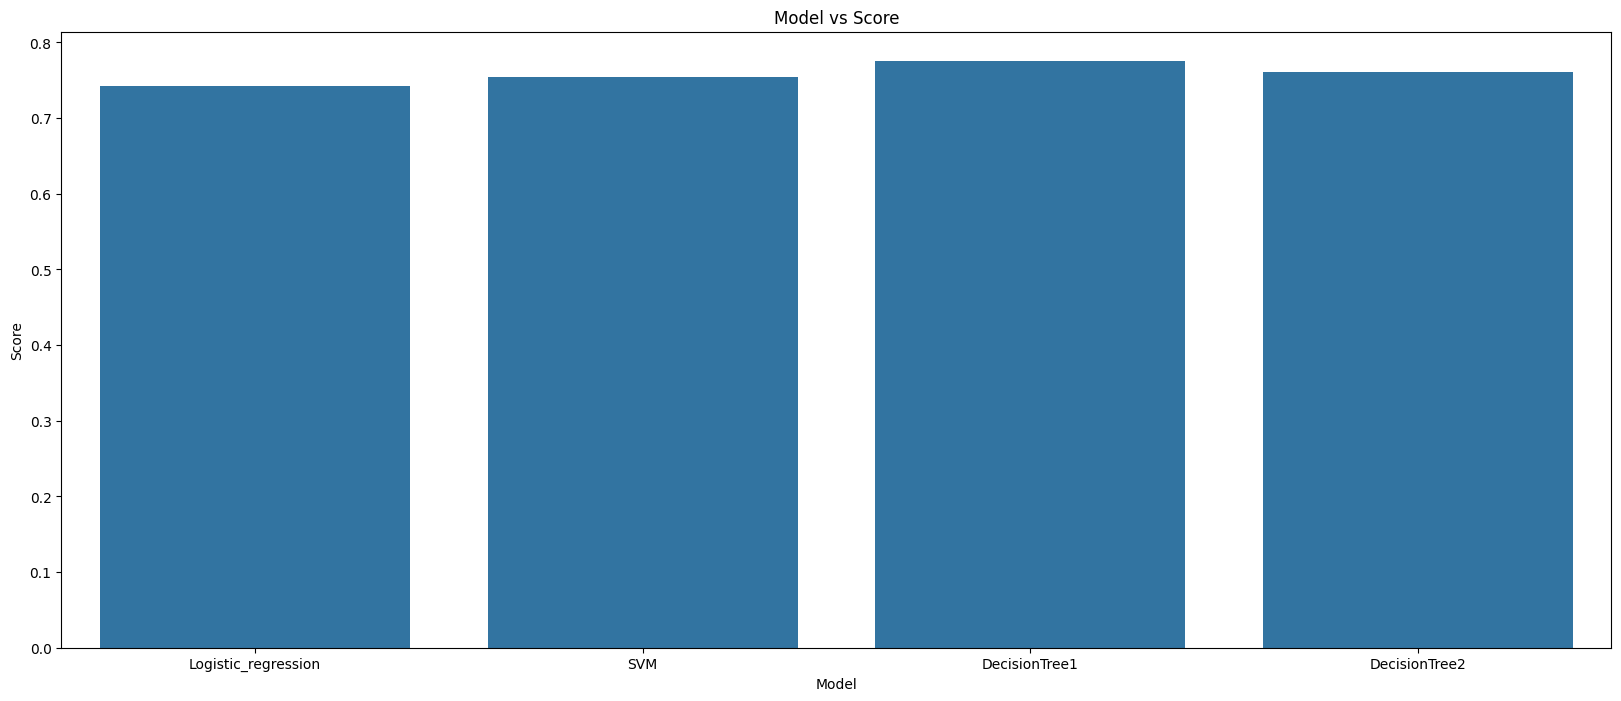

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(x='model',y='score',data=data_Score)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model vs Score')
plt.show()